In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Lab3/metacritic_game_user_comments.csv')

df


,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...
283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [3]:
df.shape

(283983, 6)

In [4]:
df.head()

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA


In [5]:
df.columns

Index(['Unnamed: 0', 'Title', 'Platform', 'Userscore', 'Comment', 'Username'], dtype='object')

In [6]:
df = df[df['Userscore'] != 0]

In [7]:
from sklearn.preprocessing import LabelEncoder

cols = df.columns.difference(['Userscore'])

le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)

<ipython-input-7-62898cdb6f50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].apply(le.fit_transform)


<Axes: xlabel='Userscore'>

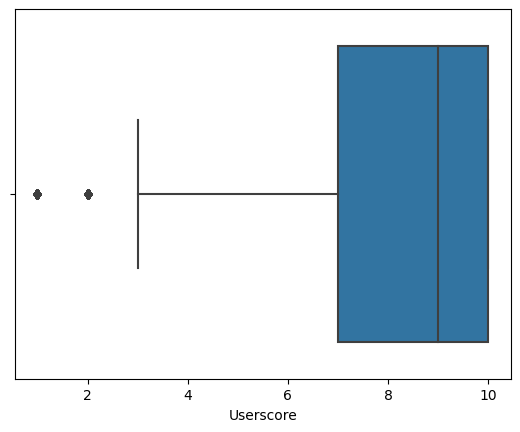

In [8]:
sns.boxplot(x=df["Userscore"])

<Axes: xlabel='Title'>

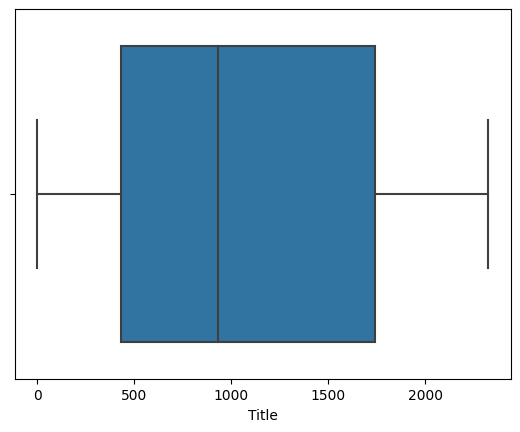

In [9]:
sns.boxplot(x=df["Title"])

<Axes: xlabel='Platform'>

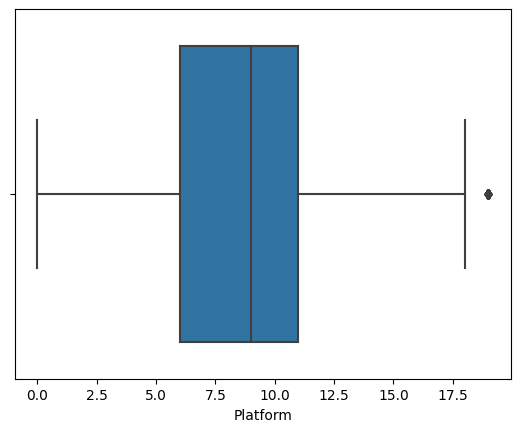

In [10]:
sns.boxplot(x=df["Platform"])

<Axes: xlabel='Comment'>

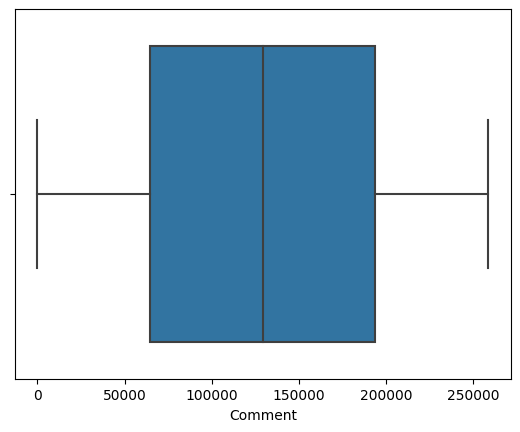

In [11]:
sns.boxplot(x=df["Comment"])

<Axes: xlabel='Username'>

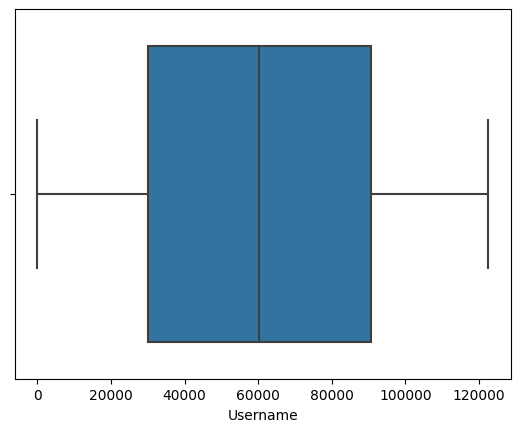

In [12]:
sns.boxplot(x=df["Username"])

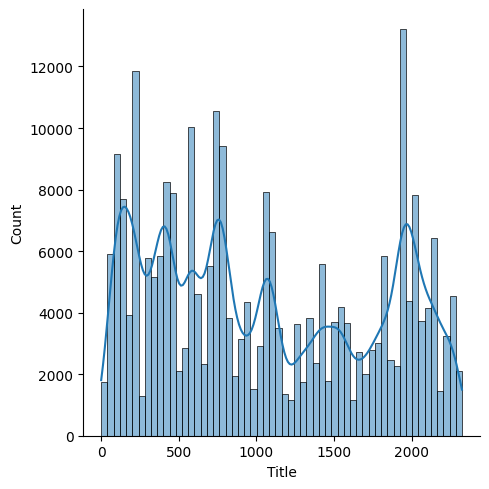

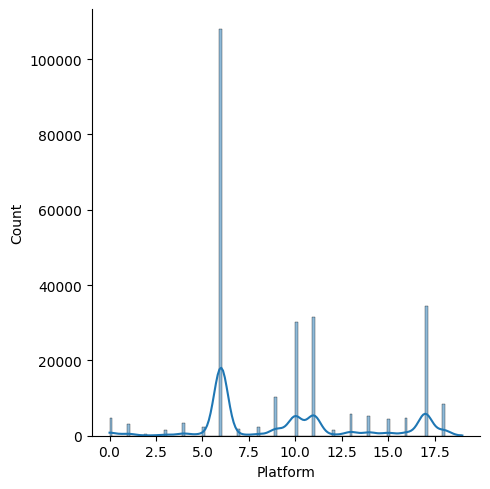

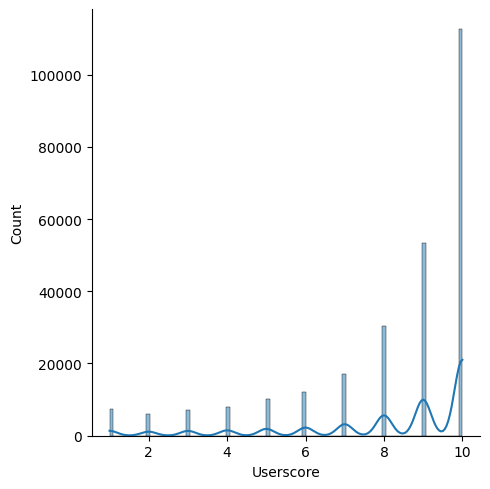

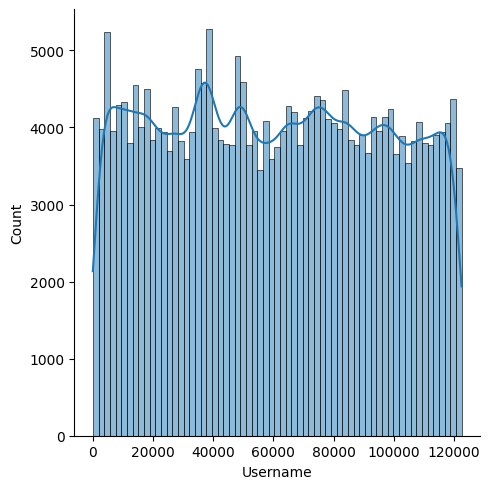

In [13]:
countnious_col = ['Title', 'Platform', 'Userscore', 'Username']
for i in countnious_col:
    sns.displot(df[i], kde=True)

In [14]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Lab3/metacritic_game_user_comments.csv')

In [15]:
from sklearn.preprocessing import LabelEncoder

cols = df1.columns.difference(['Userscore'])

le = LabelEncoder()

df1[cols] = df1[cols].apply(le.fit_transform)

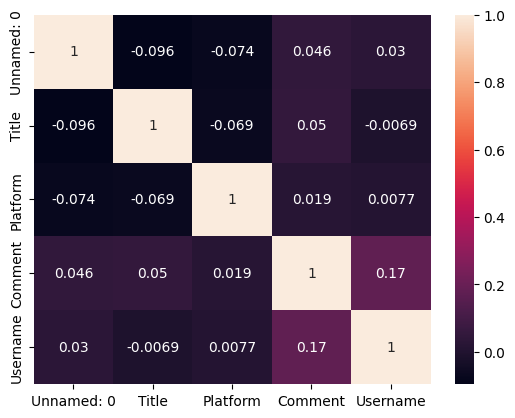

In [16]:
df1.drop(['Userscore'], inplace=True, axis=1)
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [ ]:
for i in countnious_col:
    sns.boxplot(data=df, x=i, y="Userscore")

In [ ]:
for i in countnious_col:
    sns.displot(df[i], kde=True)

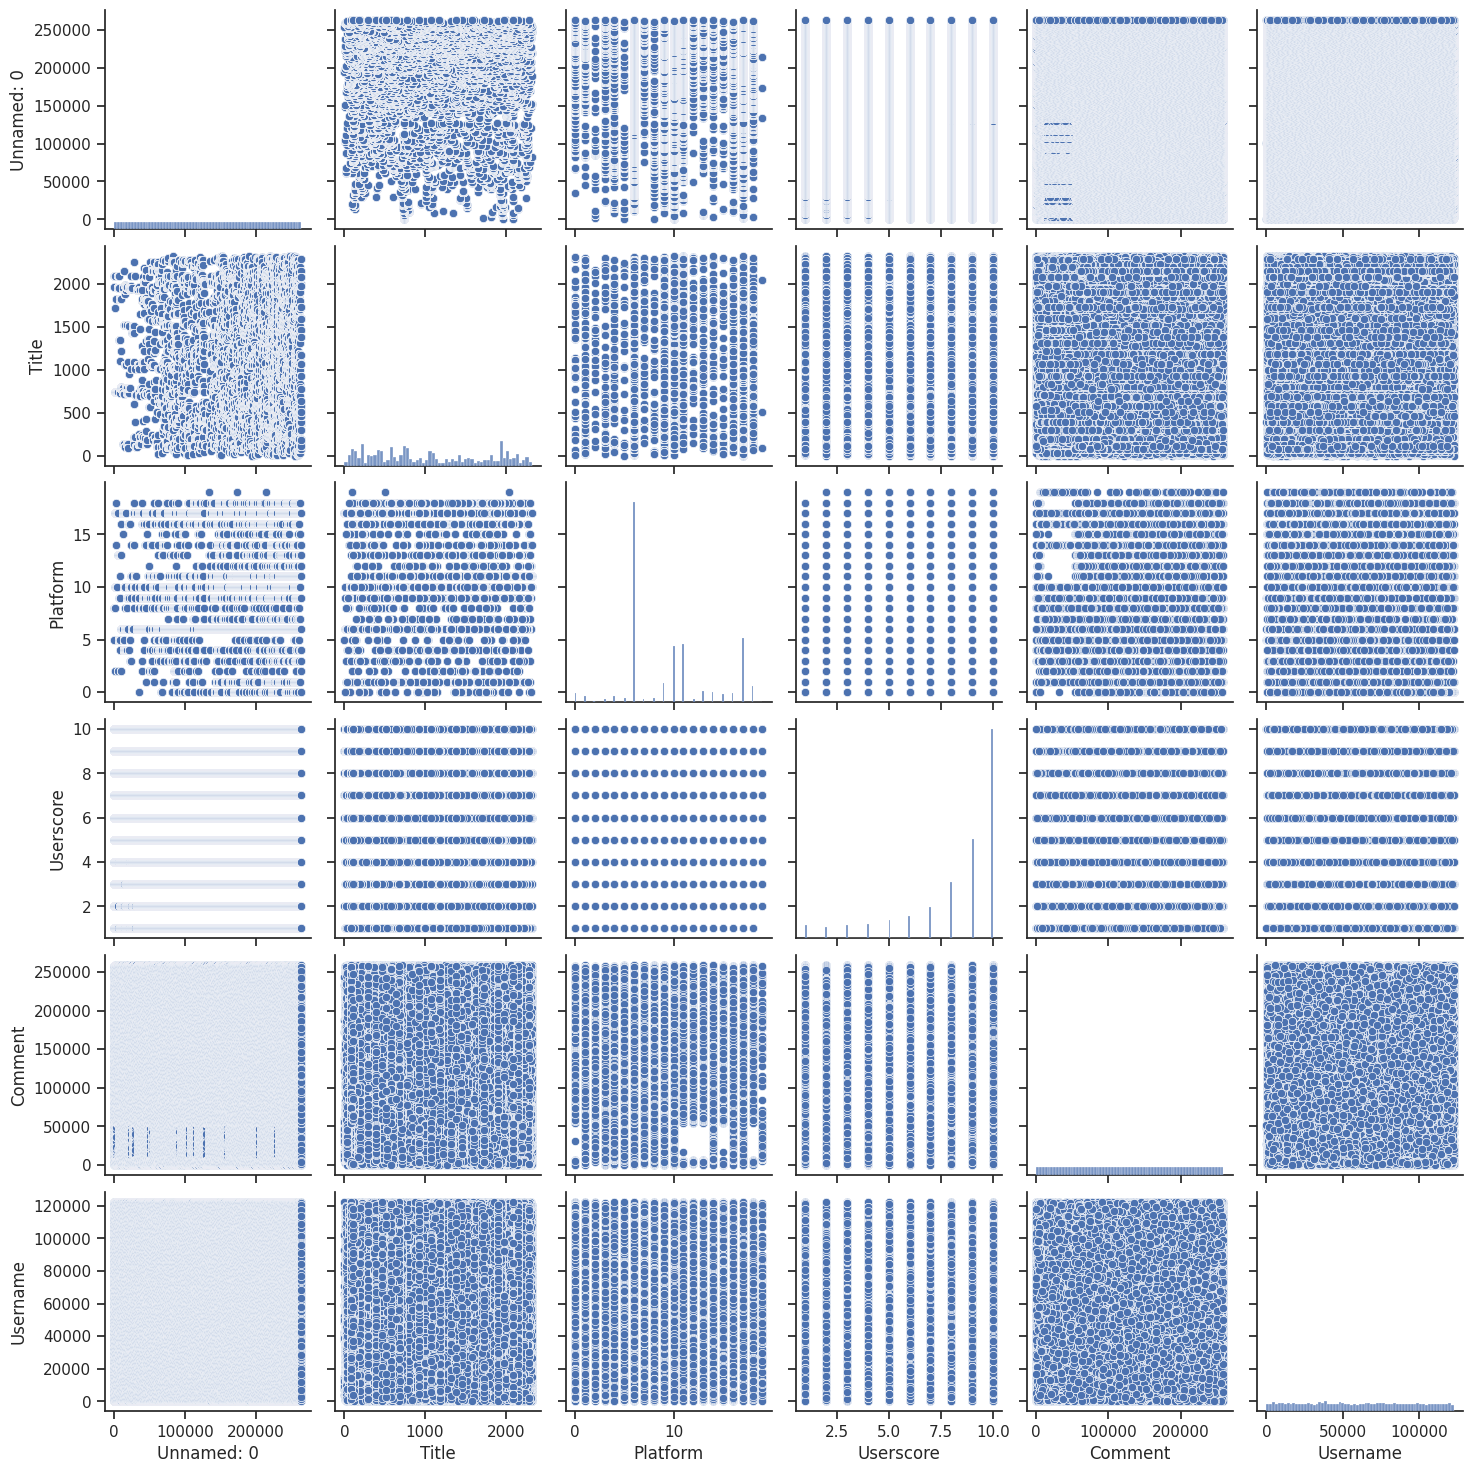

In [17]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

KNN

In [ ]:
X = df.drop(['Userscore'], axis=1)
y = df['Userscore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k = 9
knn_regressor = KNeighborsRegressor(n_neighbors=k)


knn_regressor.fit(X_train, y_train)


predictions = knn_regressor.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

DECISION TREE

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=42)

# Тренуємо модель на тренувальних даних
decision_tree.fit(X_train, y_train)

# Передбачення для тестових даних
predictions = decision_tree.predict(X_test)

# Оцінка моделі (наприклад, середньоквадратична помилка)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

SVR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#погратись з kernel
svm_regressor = SVR(kernel='linear')


svm_regressor.fit(X_train, y_train)


predictions = svm_regressor.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

RANDOM FOREST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest_regressor = RandomForestRegressor(random_state=42)


random_forest_regressor.fit(X_train, y_train)


predictions = random_forest_regressor.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'MSE Random Forest: {mse}')

ADABOOST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_regressor = AdaBoostRegressor(random_state=42)

adaboost_regressor.fit(X_train, y_train)

predictions = adaboost_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE AdaBoost: {mse}')